In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from statistics import correlation

print("setup done")

setup done


lade die Daten

In [2]:
filename="./Salary_Data.csv"
data=pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


wandele das Bildungsniveau in numerische Werte

In [3]:
# data["Education Level"] = data["Education Level"].map({"Bachelor's Degree":0, "Master's Degree":1, "PhD":2, "Bachelor's":0, "High School":3, "Master's":1, "phD":1})
education=data["Education Level"]
mapper={item:index for index, item in enumerate(education.value_counts().keys())}
data["Education Level"]=data["Education Level"].map(mapper)

wandele das Geschlecht in numerische Werte

In [4]:
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1, "Other": 2})
data["Gender"].value_counts()

Gender
0.0    3674
1.0    3014
2.0      14
Name: count, dtype: int64

wandele die Jobtitle in numerische Daten um

In [5]:
job = data["Job Title"]
mapper={ item:index for index, item in enumerate(job.value_counts().keys())}
data["Job Title"] = data["Job Title"].map(mapper)

In [6]:
[[col, data[col].isnull().sum()] for col in data.columns]

[['Age', np.int64(2)],
 ['Gender', np.int64(2)],
 ['Education Level', np.int64(3)],
 ['Job Title', np.int64(2)],
 ['Years of Experience', np.int64(3)],
 ['Salary', np.int64(5)]]

fülle die Nullwerte der numerischen Spalten mit dem Durchschnitt

In [7]:
medium_age=data["Age"].median()
years_median=data["Years of Experience"].median()
salary_median=data["Salary"].median()
job_median=data["Job Title"].median()
data["Age"]=data["Age"].fillna(medium_age)
data["Years of Experience"]=data["Years of Experience"].fillna(years_median)
data["Salary"]=data["Salary"].fillna(salary_median)
data["Job Title"]=data["Job Title"].fillna(job_median)

bearbeite die Spalten der numerischen Werte, die Nullwerte haben, die davor kategorische Werte waren

In [8]:
data["Gender"].value_counts()
data["Gender"]=data["Gender"].fillna(0)
data["Education Level"].value_counts()
data["Education Level"] = data["Education Level"].fillna(0)

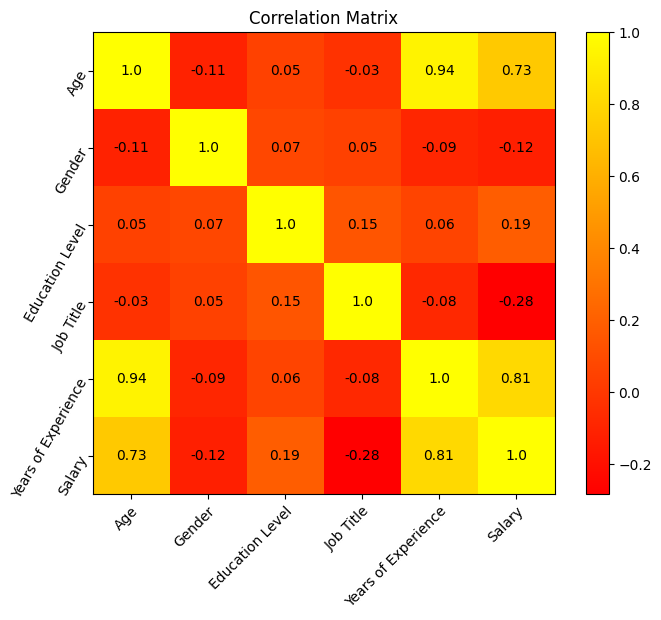

In [9]:
correlation = data.corr()
fig, axis= plt.subplots(figsize=(8,6))

axis.set_xticks(np.arange(len(correlation.columns)))
axis.set_yticks(np.arange(len(correlation.columns)))

axis.set_xticklabels(correlation.columns)
axis.set_yticklabels(correlation.columns)

plt.setp(axis.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(axis.get_yticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")

im = axis.imshow(correlation, cmap="autumn")

colorbar = plt.colorbar(im)
axis.set_title("Correlation Matrix")
for index, i in enumerate(correlation.columns):
    for idnex1, j in enumerate(correlation.columns):
        text = axis.text(idnex1, index, round(correlation[i][j], ndigits=2),
    ha="center", va="center", color="black") # if 1> correlation[i][j]>0.15 or correlation[i][j]<-0.2 else ""
plt.savefig("corr_matrix")
plt.show()

In [10]:
y=data["Salary"]
X=data.drop(["Salary"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
tree = DecisionTreeRegressor(max_depth=20, random_state=0)
tree.fit(X_train, y_train)
prediction=tree.predict(X_test)
print("rmse: ", round(rmse(y_test, prediction), 2), "$")
print(tree.get_params())

rmse:  8530.42 $
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [12]:
import pickle 

file=open("model.learn", "wb")
pickle.dump(tree, file)